In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(blocks)

In [3]:
str(blocks)

'data.frame':	100 obs. of  6 variables:
 $ Child : Factor w/ 25 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Number: int  11 9 8 9 10 13 10 7 6 12 ...
 $ Time  : num  30 19 18.6 23 29 178 42 20.2 12 39.2 ...
 $ Trial : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Shape : Factor w/ 2 levels "Cube","Cylinder": 1 1 1 1 1 1 1 1 1 1 ...
 $ Age   : num  4.67 5 4.42 4.33 4.33 4.83 4.42 5 3.58 4 ...


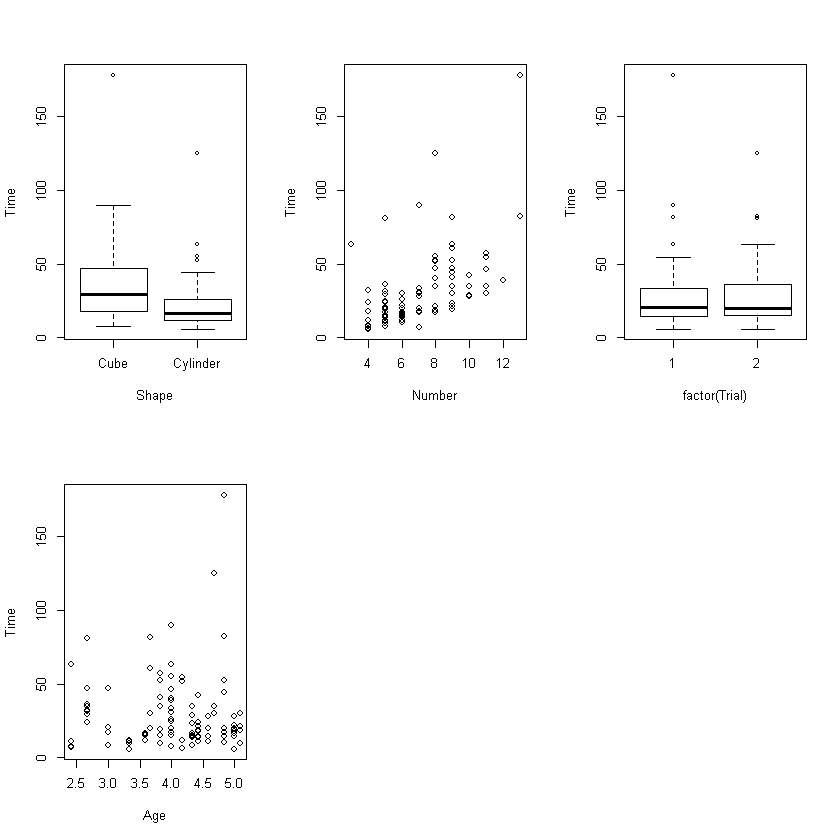

In [5]:
par(mfrow=c(3, 3))
with(blocks, {
    par(mfrow=c(2, 3))
    plot(Time ~ Shape)
    plot(Time ~ Number)
    plot(Time ~ factor(Trial))
    plot(Time ~ Age)
})

In [6]:
glm.1 <- glm(Time ~ Shape + log(Number) + log(Age) + factor(Trial), data=blocks, family = Gamma(link="log"))

In [7]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.84224723,0.6122962,3.008752,3.358289e-03
ShapeCylinder,0.20384019,0.1774723,1.148575,2.536151e-01
log(Number),1.75201555,0.2988879,5.861782,6.599099e-08
log(Age),-1.40761966,0.3724629,-3.779221,2.745321e-04
factor(Trial)2,-0.01645663,0.1356006,-0.121361,9.036614e-01


In [8]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,99,51.04962,NA,NA
Shape,1,6.144420972,98,44.90520,13.44070828,4.056962e-04
log(Number),1,9.918705653,97,34.98650,21.69682544,1.037602e-05
log(Age),1,6.053748816,96,28.93275,13.24236608,4.450804e-04
factor(Trial),1,0.006683205,95,28.92606,0.01461928,9.040175e-01


In [9]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1) # Kiểm tra điều kiện xấp xỉ yên ngựa
gof.pearson / df.residual(glm.1)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 1

[1] 0.9999988

[1] 0.3044849

[1] 0.4571501


	Shapiro-Wilk normality test

data:  qr1
W = 0.88959, p-value = 4.73e-07


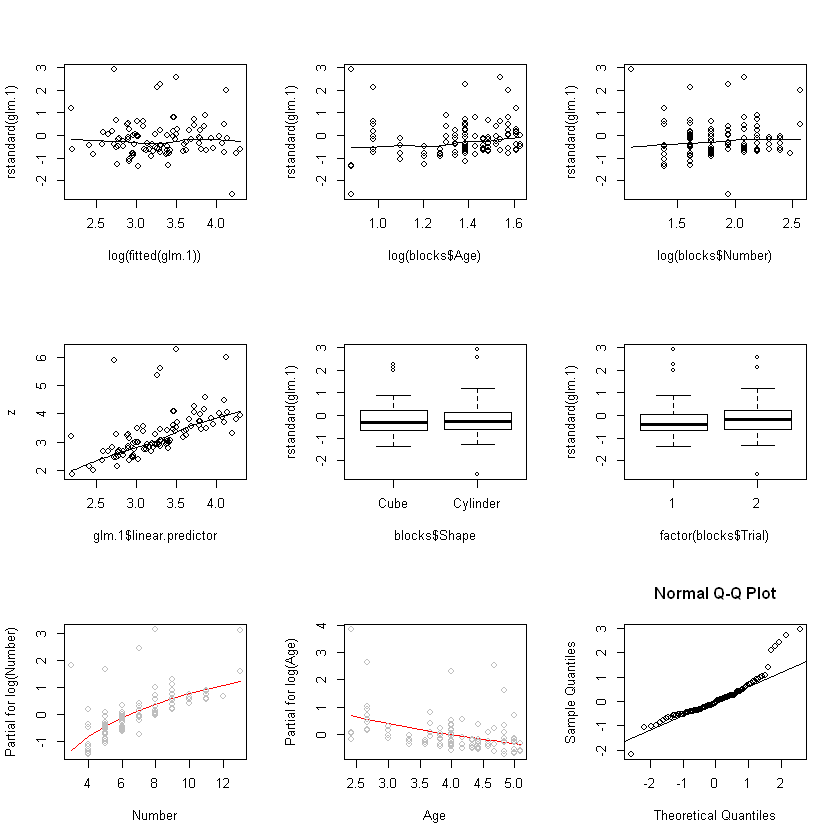

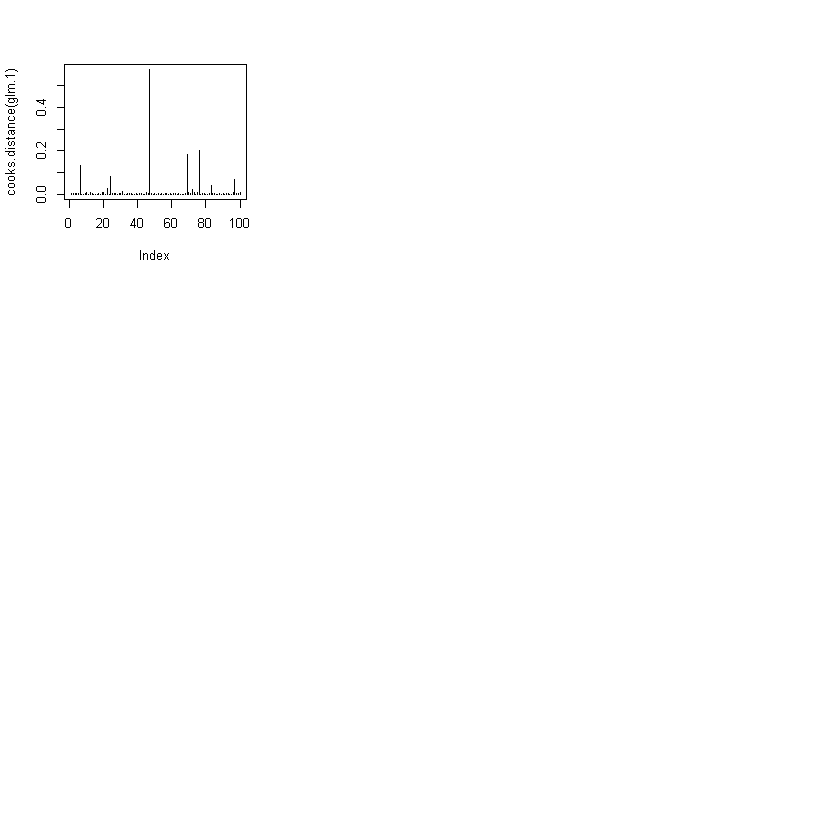

In [16]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ log(blocks$Age))
scatter.smooth(rstandard(glm.1) ~ log(blocks$Number))
z <- resid(glm.1, type="working") + glm.1$linear.predictor
scatter.smooth(z ~ glm.1$linear.predictor)
plot(rstandard(glm.1) ~ blocks$Shape)
plot(rstandard(glm.1) ~ factor(blocks$Trial))
termplot(glm.1, partial.resid = TRUE, terms="log(Number)")
termplot(glm.1, partial.resid = TRUE, terms="log(Age)")
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
plot(cooks.distance(glm.1), type="h")
shapiro.test(qr1)

In [17]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.ShpC dfb.l(N) dfb.l(A) dfb.f(T)    dffit    cov.r   cook.d 
       1        0        0        1        0        5        6        0 
     hat 
       0

In [21]:
glm.2 <- glm(Time ~ Shape + log(Number) + log(Age) + factor(Trial), data=blocks, family = inverse.gaussian(link="log"))

Warning message:
"glm.fit: algorithm did not converge"

In [22]:
coef(summary(glm.2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.22453036,0.6073705,3.6625591,4.107185e-04
ShapeCylinder,0.20387609,0.1735999,1.1744019,2.431696e-01
log(Number),1.70239163,0.3028951,5.6204006,1.900526e-07
log(Age),-1.64412197,0.3657405,-4.4953239,1.960548e-05
factor(Trial)2,0.05418823,0.1292396,0.4192851,6.759544e-01



	Shapiro-Wilk normality test

data:  qr2
W = 0.96268, p-value = 0.006277


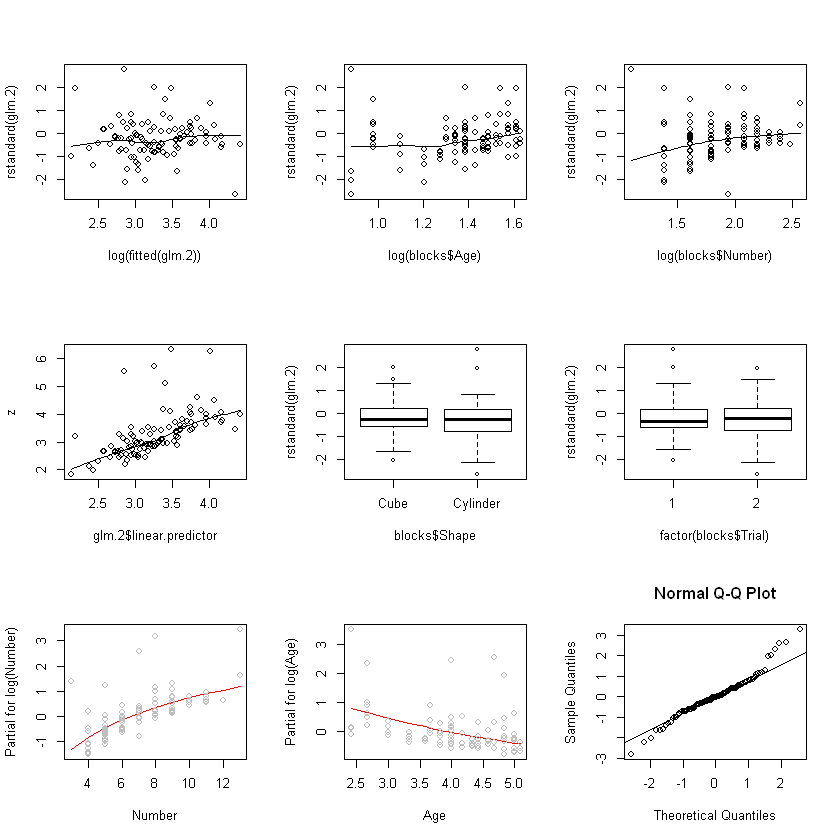

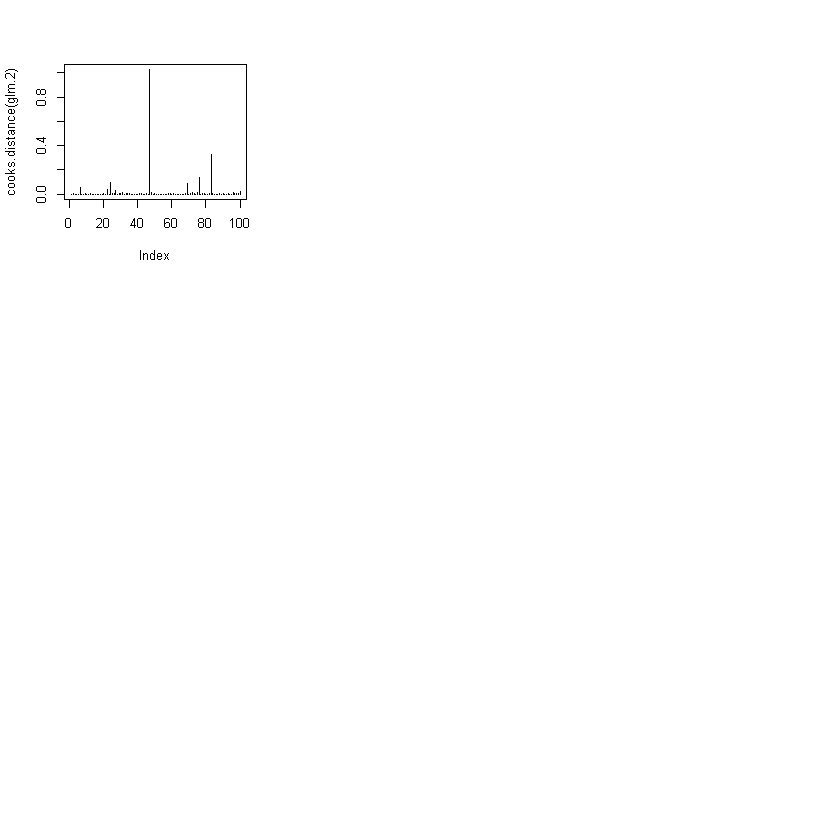

In [24]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.2) ~ log(fitted(glm.2)))
scatter.smooth(rstandard(glm.2) ~ log(blocks$Age))
scatter.smooth(rstandard(glm.2) ~ log(blocks$Number))
z <- resid(glm.2, type="working") + glm.2$linear.predictor
scatter.smooth(z ~ glm.2$linear.predictor)
plot(rstandard(glm.2) ~ blocks$Shape)
plot(rstandard(glm.2) ~ factor(blocks$Trial))
termplot(glm.2, partial.resid = TRUE, terms="log(Number)")
termplot(glm.2, partial.resid = TRUE, terms="log(Age)")
qqnorm(qr2 <- qresid(glm.2))
qqline(qr2)
plot(cooks.distance(glm.2), type="h")
shapiro.test(qr2)

In [26]:
colSums(influence.measures(glm.2)$is.inf)

dfb.1_ dfb.ShpC dfb.l(N) dfb.l(A) dfb.f(T)    dffit    cov.r   cook.d 
       1        0        0        0        0        4        8        1 
     hat 
       3

In [25]:
extractAIC(glm.1)
extractAIC(glm.2)

[1]   5.0000 803.0041

[1]   5.000 793.307